# Agrupamento

## Imports

In [49]:
import pandas as pd
import numpy as np
import warnings

from sklearn import metrics as mt
from sklearn import cluster as ct
from matplotlib import pyplot as plt

### Load Datasets

In [50]:
X = pd.read_csv('X_dataset.csv')

## K-Means

In [51]:
k = np.arange(2, 11, 1)

silhouette_list = []
for i in k:
    print(f'K-Number: {i}')
    warnings.filterwarnings("ignore")
    # model definition
    model = ct.KMeans(n_clusters=i, n_init='auto')

    # model training
    labels = model.fit_predict(X)

    # performance
    silhouette_score = mt.silhouette_score(X, labels)
    silhouette_list.append(silhouette_score)
    print(f'Silhouette Score: {silhouette_score}\n')
    

K-Number: 2
Silhouette Score: 0.19778929059291303

K-Number: 3
Silhouette Score: 0.22922511110349103

K-Number: 4
Silhouette Score: 0.21795720356501808

K-Number: 5
Silhouette Score: 0.19037856355672642

K-Number: 6
Silhouette Score: 0.15024591923720648

K-Number: 7
Silhouette Score: 0.19444225881410052

K-Number: 8
Silhouette Score: 0.16025110359923325

K-Number: 9
Silhouette Score: 0.17136449432233494

K-Number: 10
Silhouette Score: 0.15256020870393755



In [52]:
best_k = k[silhouette_list.index(max(silhouette_list))]

# model definition
k_means = ct.KMeans(n_clusters=best_k, n_init='auto')

# model training
labels = k_means.fit_predict(X)

# performance - silhouette score
silhouette_score = mt.silhouette_score(X, labels)
clusters = len(np.unique(labels))

df_kmeans = {'Algoritmo': 'K-Means', 'Clusters': clusters, 'Silhouette Score': round(silhouette_score,3)}
df_kmeans = pd.DataFrame(data=df_kmeans, index=[0])
df_kmeans



,Algoritmo,Clusters,Silhouette Score
0,K-Means,3,0.232


## Affinity Propagation

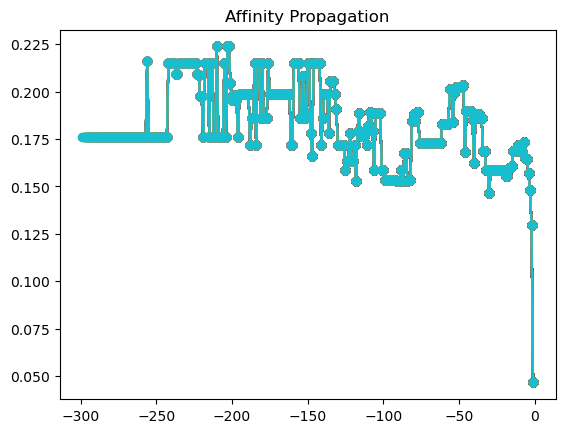

In [53]:
p = np.arange(-1, -301, -1)
ss_list = []

for i in range(len(p)):
    # model definition
    model = ct.AffinityPropagation(preference=p[i])

    model.fit(X)

    labels = model.predict(X)

    ss = mt.silhouette_score(X, labels)

    ss_list.append(ss)
    

    # plot
    plt.plot(p[:i], ss_list[:i], marker='o')
    plt.title('Affinity Propagation')
    

In [54]:
p_best = p[ss_list.index(max(ss_list))]

# model definition
model = ct.AffinityPropagation(preference=p_best)

model.fit(X)

labels = model.predict(X)

ss = mt.silhouette_score(X, labels)
cluster = len(np.unique(labels))
print(ss)
print(cluster)

df_affinity = {'Algoritmo': 'Affinity Propagation', 'Clusters': cluster, 'Silhouette Score': ss}
df_affinity = pd.DataFrame(data= df_affinity, index=[0])
df_affinity

0.2238198554645042
3


,Algoritmo,Clusters,Silhouette Score
0,Affinity Propagation,3,0.22382


# Relatório Agrupamento

In [55]:
df_final = pd.concat([df_kmeans, df_affinity]).reset_index(drop=True)
df_final

,Algoritmo,Clusters,Silhouette Score
0,K-Means,3,0.23200
1,Affinity Propagation,3,0.22382
